In [1]:
import numpy as np
import os,sys

sys.path.append('.')
sys.path.append('../RL_lib/Utils')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/Asteroid_CPO/Imaging


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Image a cube's vertices
## grayscale: 0 is black, higher intensities are lighter
## here intensities are ranges.  so foreground should have smaller range, and therefore be darker
## Optical axis +Z (default)

# Centered

Euler321 Attitude
Quaternion_attitude
Euler321 Attitude
Overriding focal length using FOV:  2.356194490192345 5.767119023633959
K: 
[[57.67119024  0.         50.        ]
 [ 0.         57.67119024 50.        ]
 [ 0.          0.          1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
[0. 0. 1.]


<IPython.core.display.Javascript object>


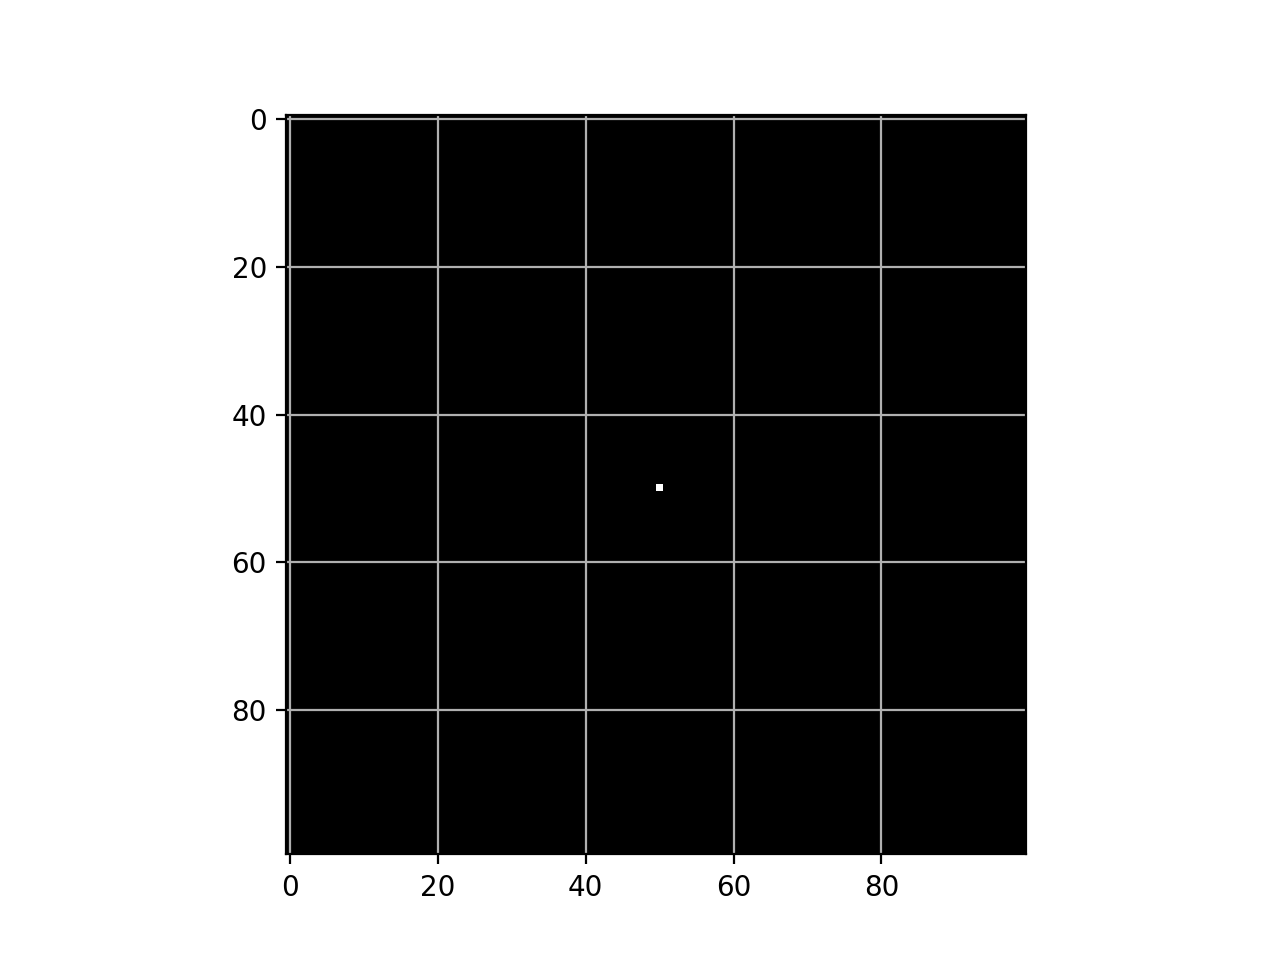

[[50 50]] [200.] (1, 2)
[ 50.  50. 200.]
ET:  0.07097101211547852


In [147]:
from camera_model import Camera_model
from range_sensor import Range_sensor
import attitude_utils as attu
import optics_utils as optu
import itertools
from time import time
ap = attu.Euler_attitude()
ap = attu.Quaternion_attitude()
object_locations = np.asarray([[0.,0.,200.],
                               [10., 0., 150.],
                              [0., 10., 100.]])

object_locations = np.asarray([0.,0.,100.])
agent_location = 1.0*np.asarray([0,0,300])
agent_velocity = 1.0*np.asarray([0.0,0.0,-1])
#object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi - np.pi/4


yaw = 0.0
pitch = 0.0
roll = 0.0
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])


cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb,
                   fov=fov, debug=False)
sensor = Range_sensor(cm, attitude_parameterization=ap)

t0 = time()
pixel_coords, object_intensities = sensor.get_pixel_coords_3dof(agent_location, agent_velocity, 
                                                                object_locations, render=True)
print(pixel_coords,object_intensities,pixel_coords.shape)
print(np.hstack((pixel_coords[0],object_intensities)))
t1 = time()
print('ET: ',t1-t0)

#sensor.render(agent_location, agent_velocity, object_locations)


v:  [-0.05 -0.05 -1.05]
agent_q:  [ 0.03361465  0.70670717 -0.70670717  0.        ]


<IPython.core.display.Javascript object>


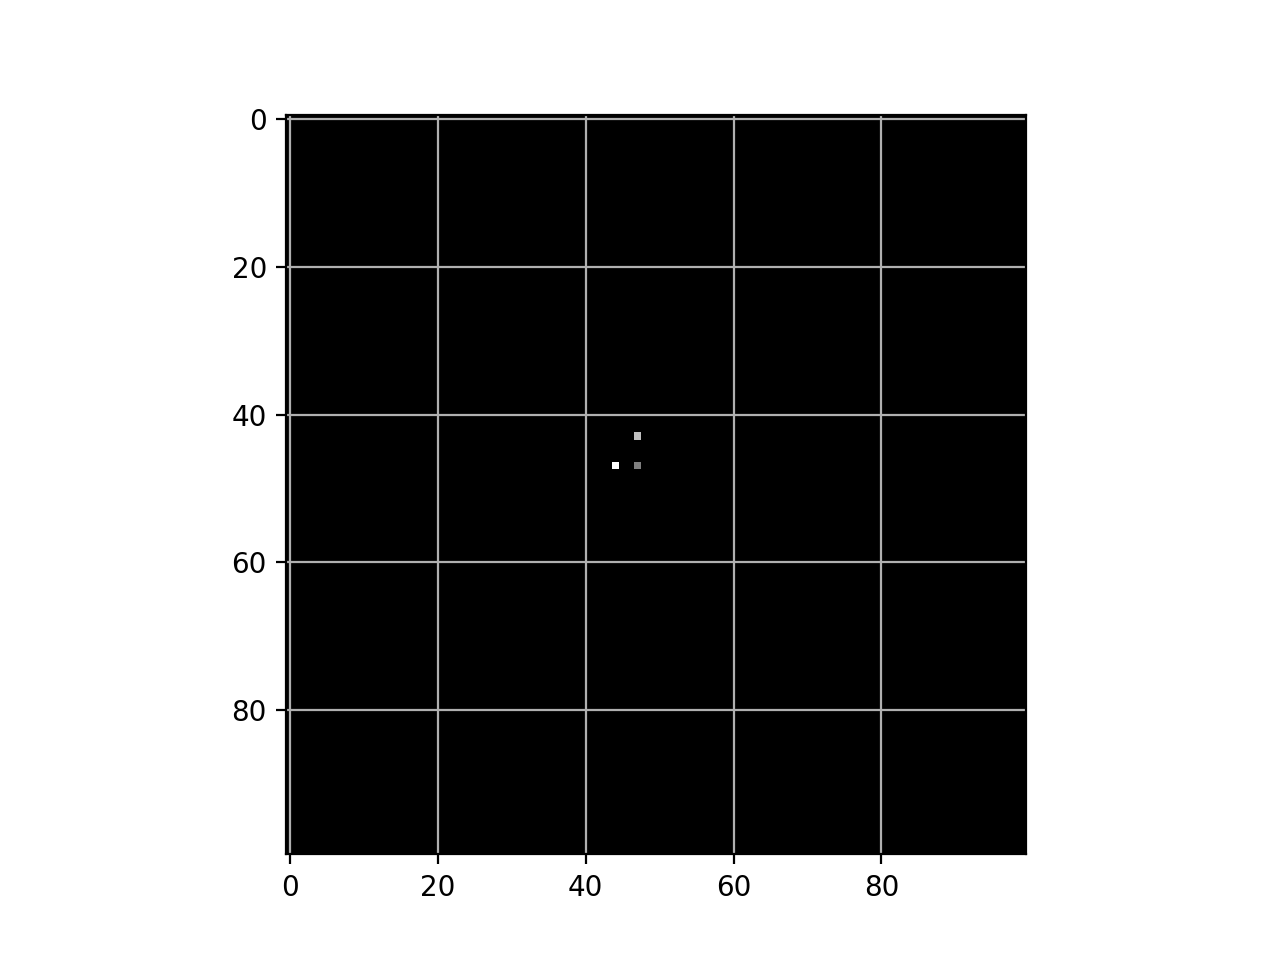

[[3 3]
 [3 7]
 [6 3]]
v:  [-0.1 -0.1 -1.1]
agent_q:  [ 0.06388819  0.70566221 -0.70566221  0.        ]


<IPython.core.display.Javascript object>


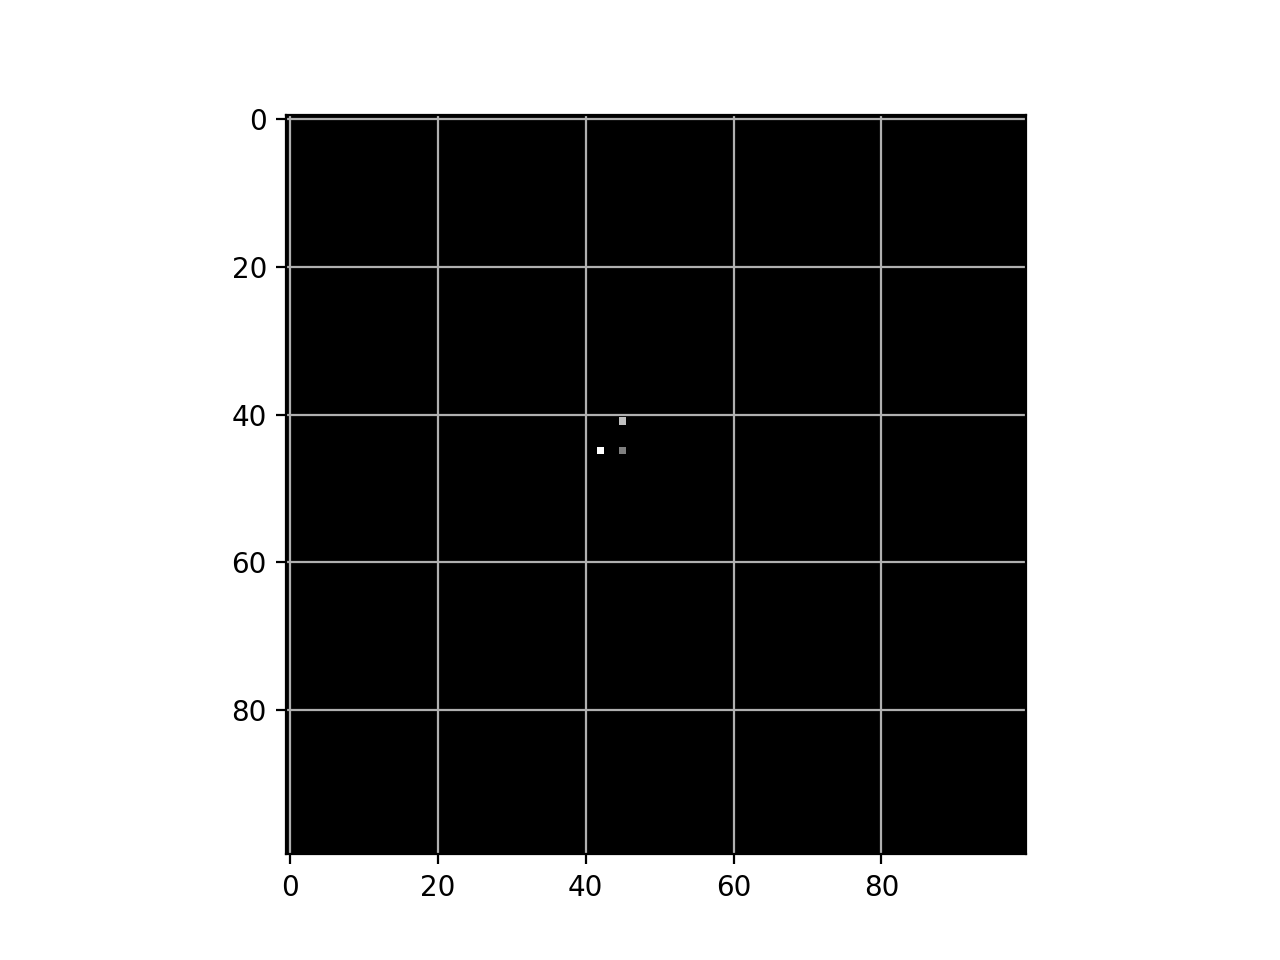

[[5 5]
 [5 9]
 [8 5]]
v:  [-0.15 -0.15 -1.15]
agent_q:  [ 0.09107967  0.70416777 -0.70416777  0.        ]


<IPython.core.display.Javascript object>


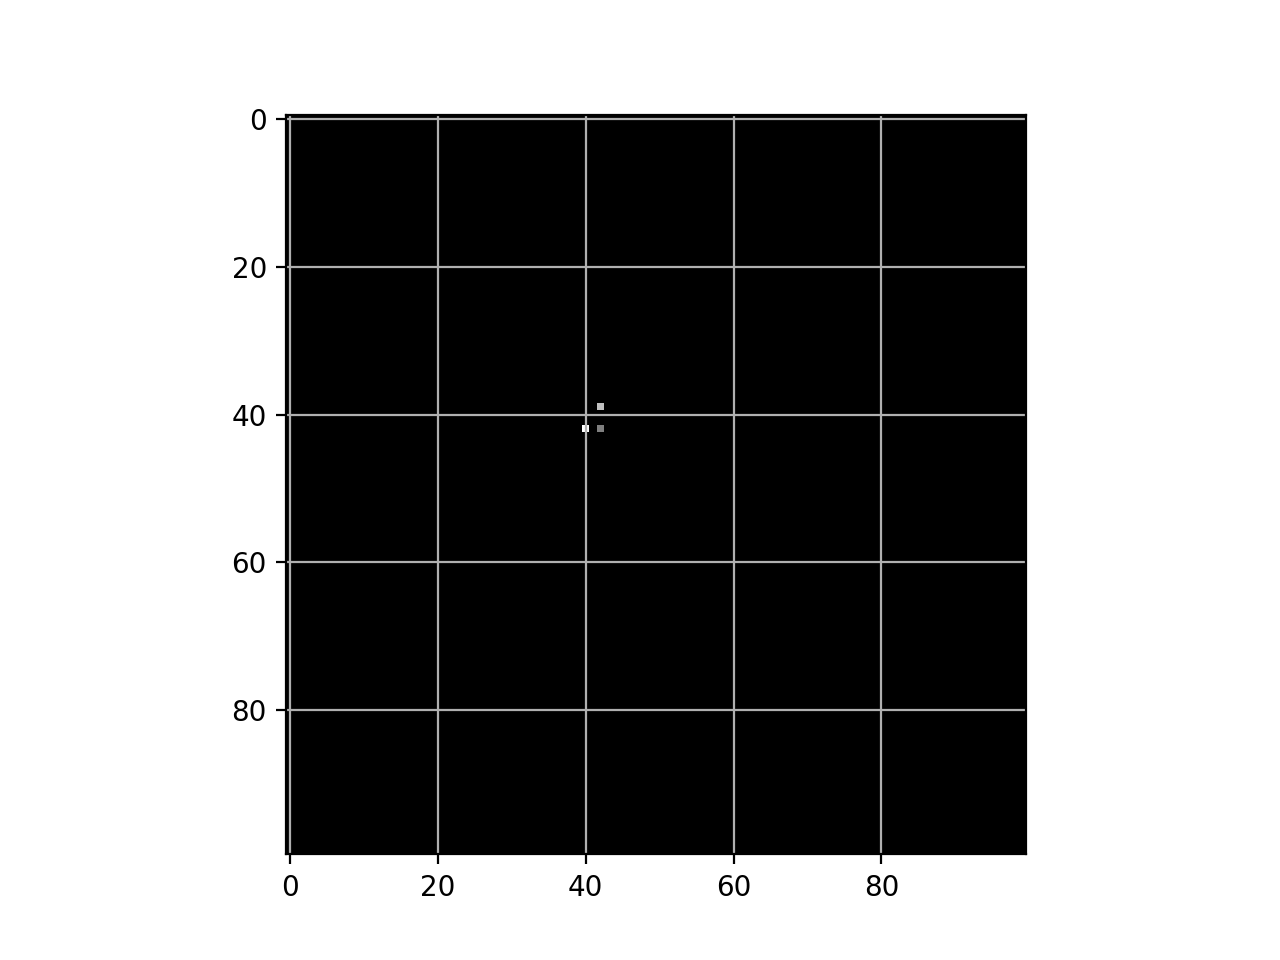

[[ 8  8]
 [ 8 11]
 [10  8]]
v:  [-0.2 -0.2 -1.2]
agent_q:  [ 0.11548046  0.70237606 -0.70237606  0.        ]


<IPython.core.display.Javascript object>


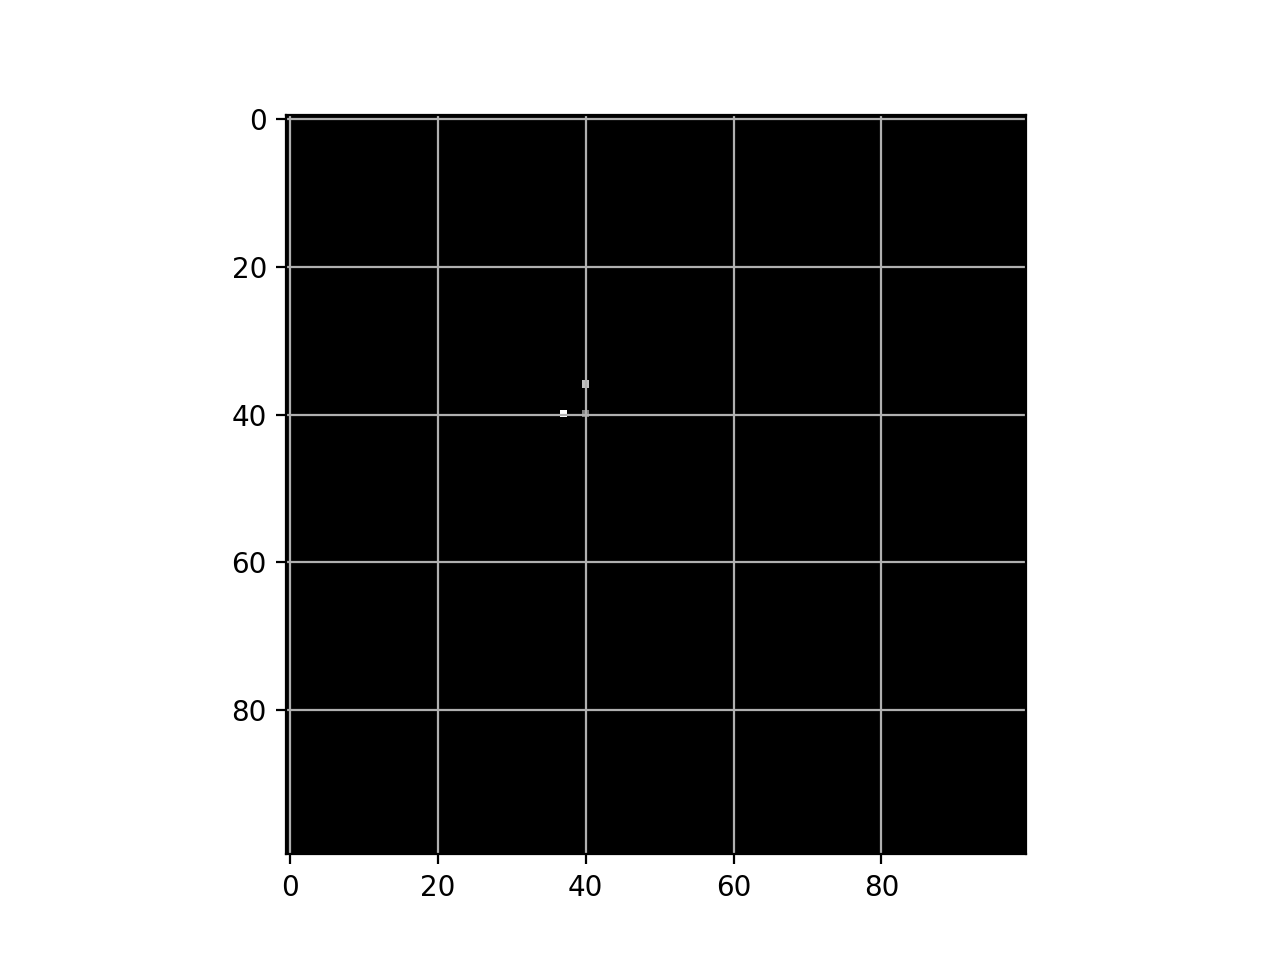

[[10 10]
 [10 14]
 [13 10]]
v:  [-0.25 -0.25 -1.25]
agent_q:  [ 0.1373855   0.70040175 -0.70040175  0.        ]


<IPython.core.display.Javascript object>


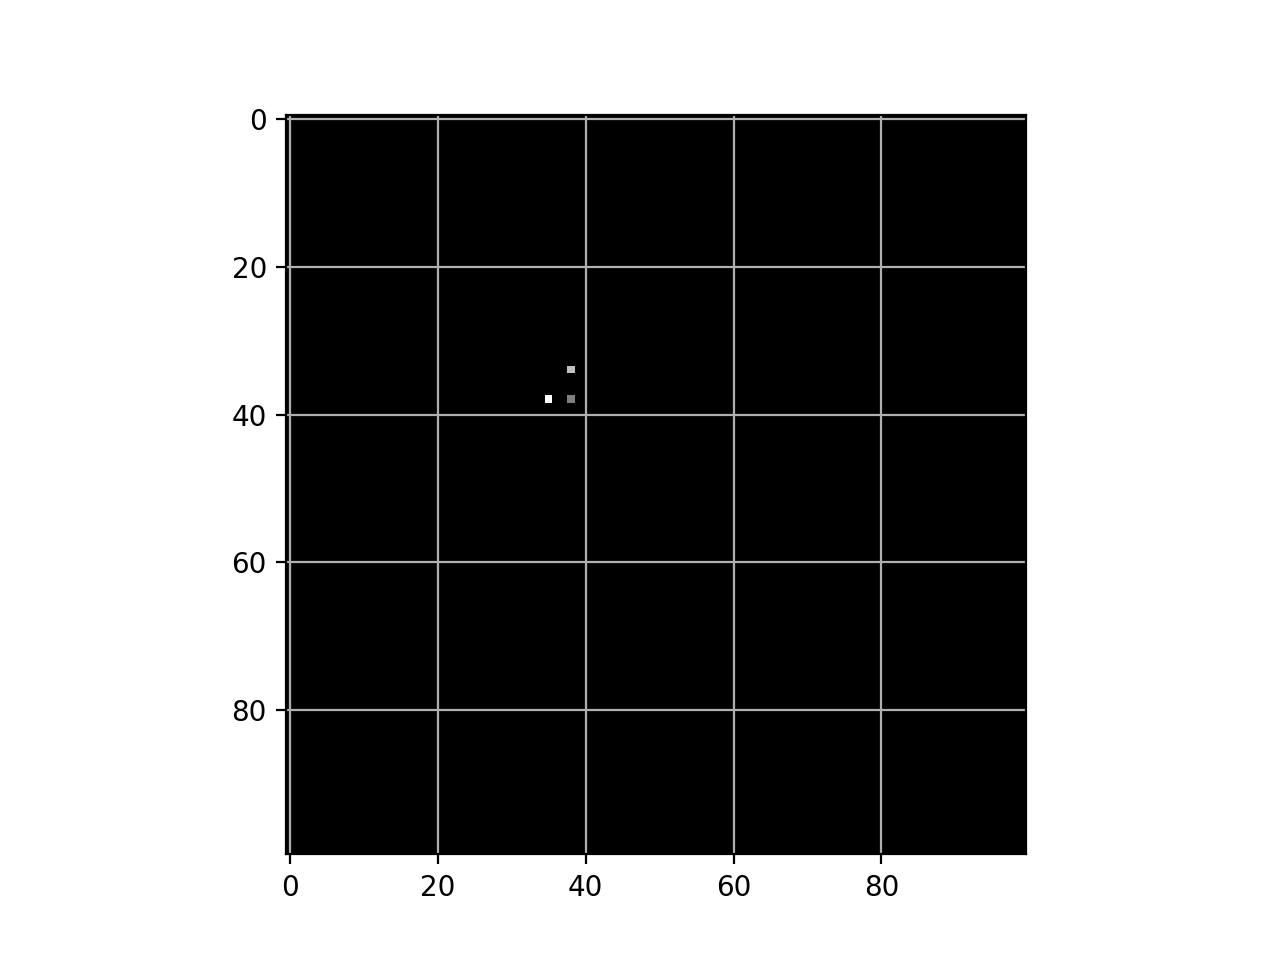

[[12 12]
 [12 16]
 [15 12]]


In [123]:
import time
v = 1.0*np.asarray([0,0.0,-1])    
for i in range(5):
    v -= 0.05
    print('v: ', v)
    pixel_coords, object_intensities = sensor.get_pixel_coords_3dof(agent_location, v, 
                                                                object_locations, render=True)
    print(pixel_coords)
    
    

    

# Positive Roll, Image should move down in FOV

Euler321 Attitude
Overriding focal length using FOV:  0.7853981633974483 13.361957121094465
K: 
[[133.61957121   0.          50.        ]
 [  0.         133.61957121  50.        ]
 [  0.           0.           1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
pixel_locs.shape:  (8, 2)
ET:  0.0016019344329833984
pixel_locs.shape:  (8, 2)
(8, 2) (8,) (8,)


<IPython.core.display.Javascript object>


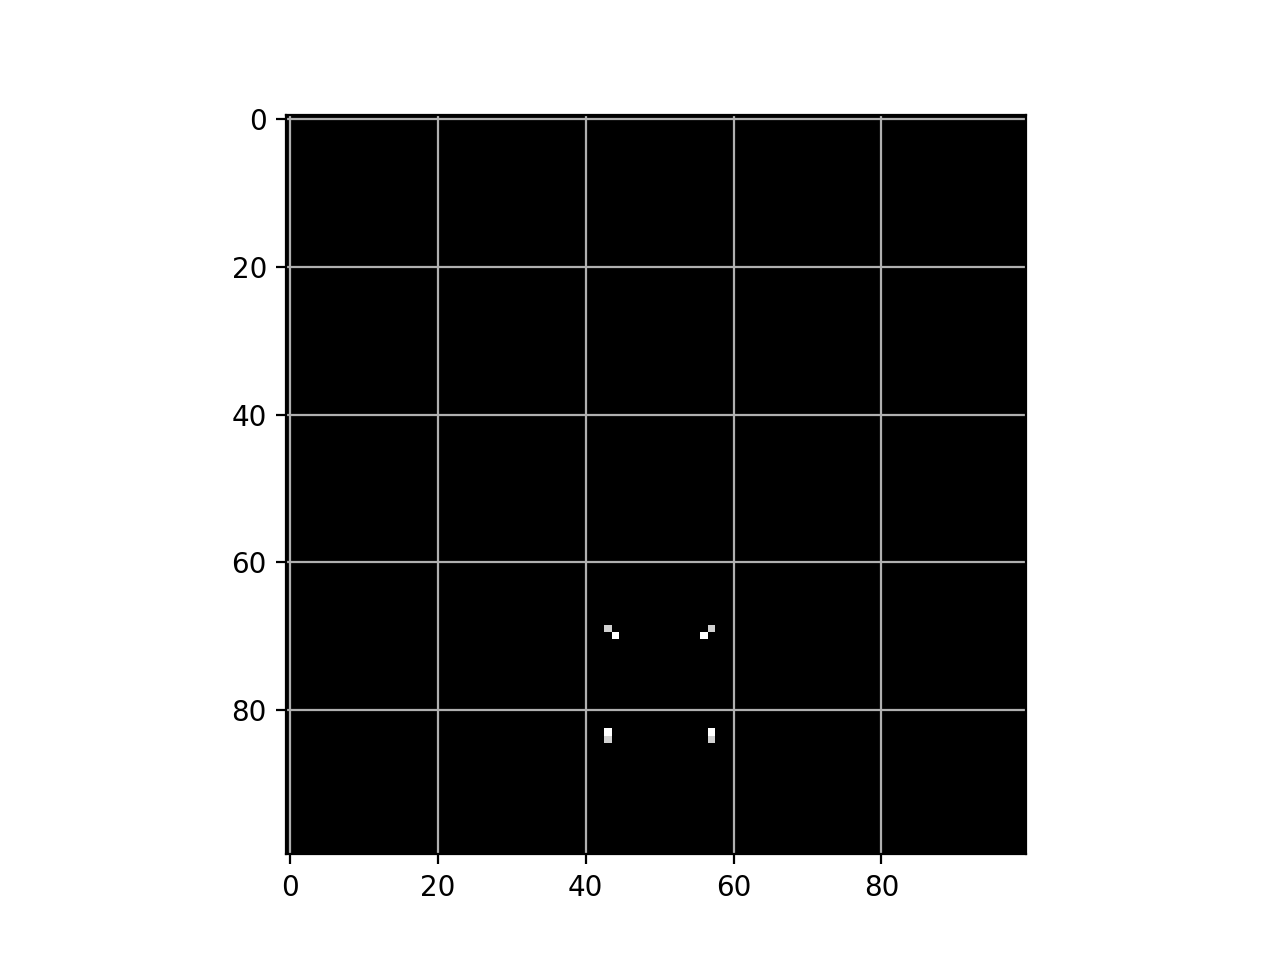

Image values:  0.0 55.23782589924595


In [23]:
object_locations = optu.make_cube(10.,1.0*np.asarray([0,0,200]))

agent_location = 1.0*np.asarray([0,0,100])
object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi/4


yaw = 0.0
pitch = 0.0
roll = np.pi/16
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])


cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb,
                   fov=fov, debug=False)
t0 = time()
pix1 = cm.get_pixel_coords(agent_location, agent_q, object_locations, object_intensities)
t1 = time()
print('ET: ',t1-t0)

cm.render(agent_location, agent_q, object_locations, object_intensities)


# Negative Pitch, Image should move right

Euler321 Attitude
Overriding focal length using FOV:  0.7853981633974483 13.361957121094465
K: 
[[133.61957121   0.          50.        ]
 [  0.         133.61957121  50.        ]
 [  0.           0.           1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
pixel_locs.shape:  (8, 2)
ET:  0.0051801204681396484
pixel_locs.shape:  (8, 2)
(8, 2) (8,) (8,)


<IPython.core.display.Javascript object>


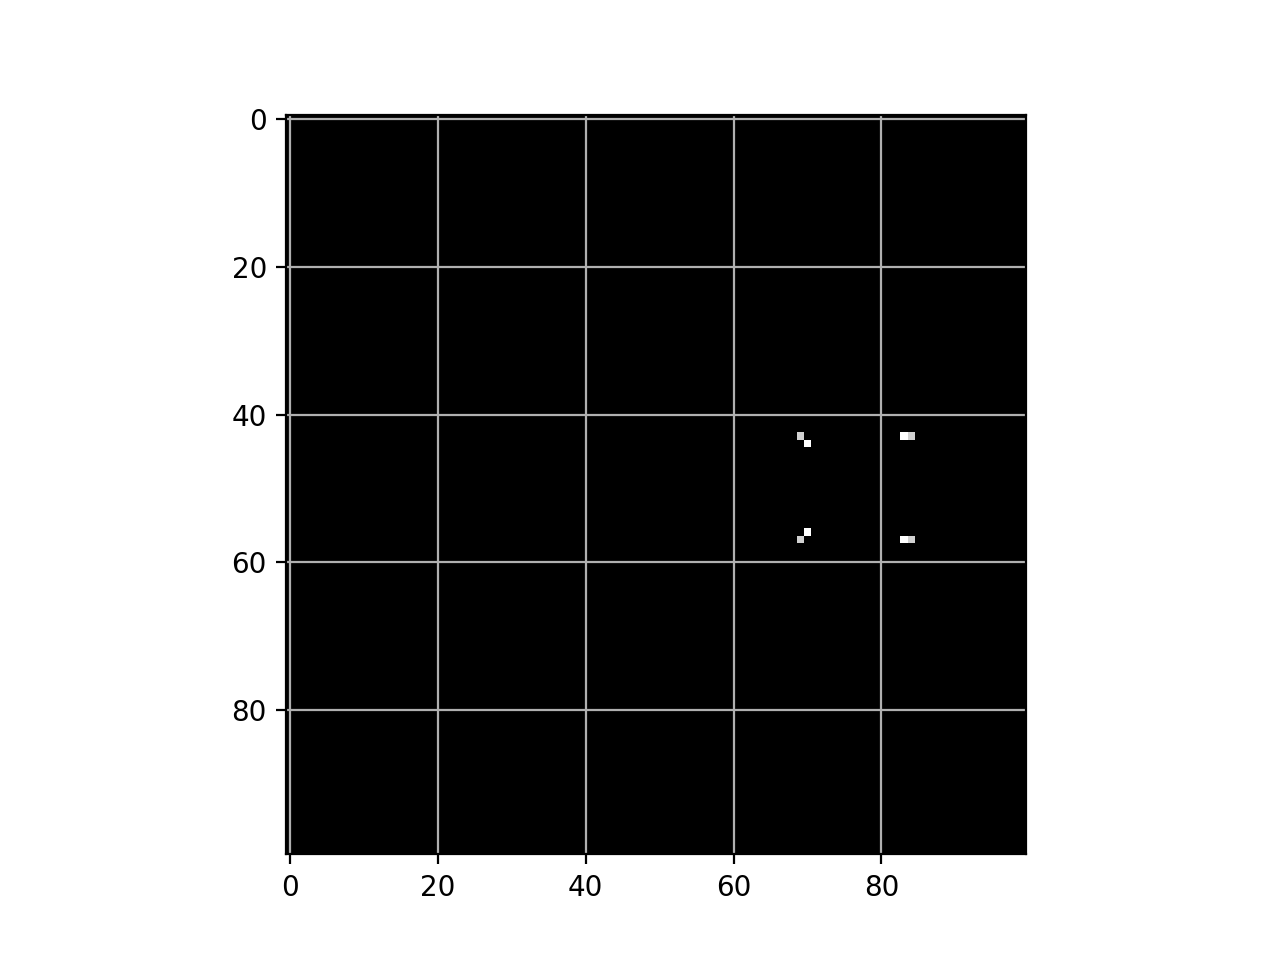

Image values:  0.0 55.23782589924595


In [24]:
object_locations = optu.make_cube(10.,1.0*np.asarray([0,0,200]))

agent_location = 1.0*np.asarray([0,0,100])
object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi/4


yaw = 0.0
pitch = -np.pi/16
roll = 0.0
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])


cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb,
                   fov=fov, debug=False)
t0 = time()
pix1 = cm.get_pixel_coords(agent_location, agent_q, object_locations, object_intensities)
t1 = time()
print('ET: ',t1-t0)

cm.render(agent_location, agent_q, object_locations, object_intensities)


# Positive Yaw should rotate image

Euler321 Attitude
Overriding focal length using FOV:  0.7853981633974483 13.361957121094465
K: 
[[133.61957121   0.          50.        ]
 [  0.         133.61957121  50.        ]
 [  0.           0.           1.        ]]
C_cb: 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
t: 
pixel_locs.shape:  (8, 2)
ET:  0.0015840530395507812
pixel_locs.shape:  (8, 2)
(8, 2) (8,) (8,)


<IPython.core.display.Javascript object>


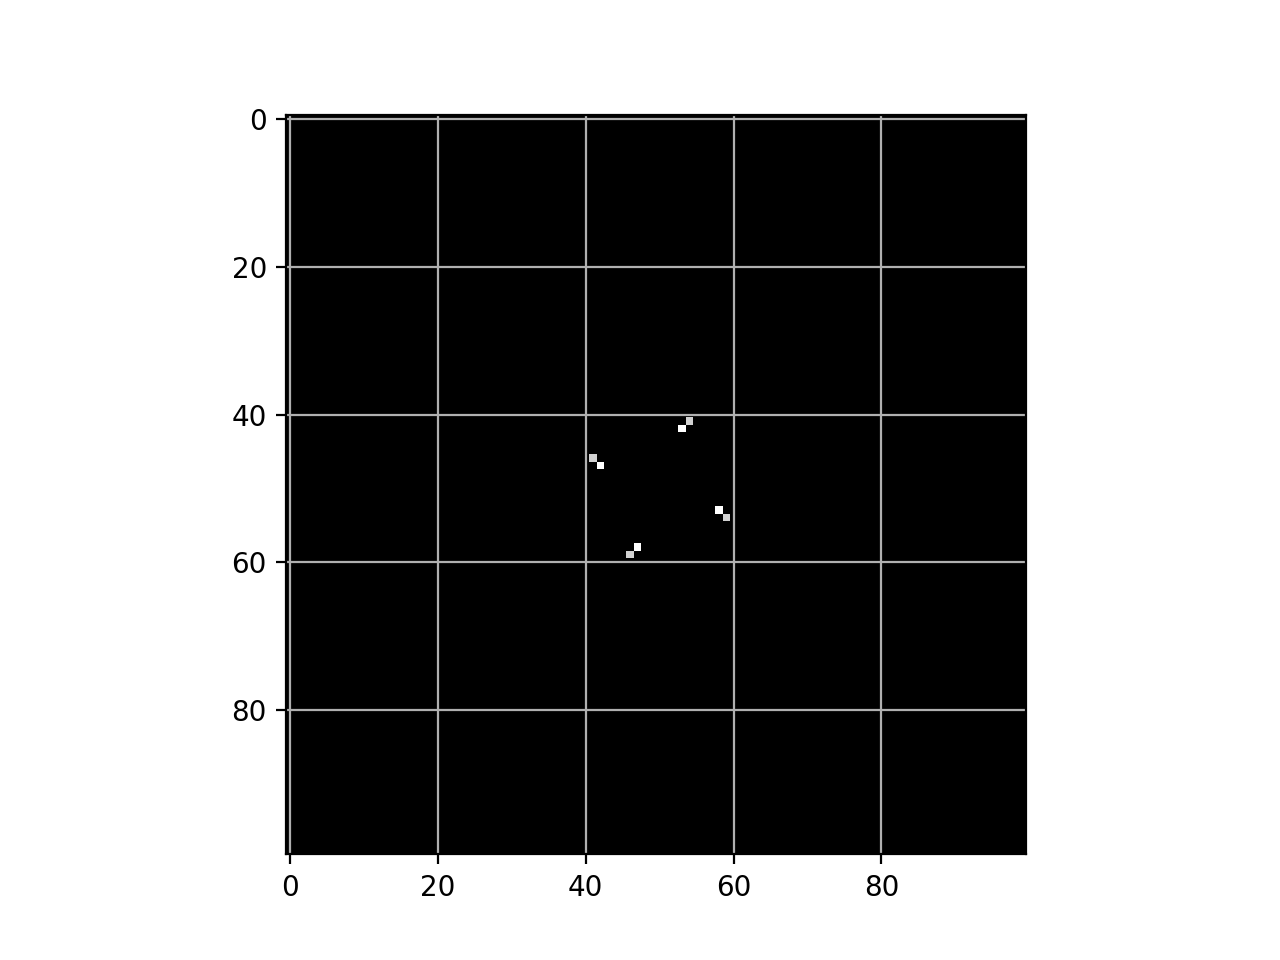

Image values:  0.0 55.23782589924595


In [25]:
object_locations = optu.make_cube(10.,1.0*np.asarray([0,0,200]))

agent_location = 1.0*np.asarray([0,0,100])
object_intensities = np.linalg.norm(object_locations-agent_location,axis=1)-50
fov=np.pi/4


yaw = np.pi/8
pitch = 0.0
roll = 0.0
agent_q = np.asarray([yaw,pitch,roll])


C_cb = optu.rotate_optical_axis(0.0, 0.0, 0.0)
r_cb = np.asarray([0,0,0])


cm = Camera_model(attitude_parameterization=ap, C_cb=C_cb, r_cb=r_cb,
                   fov=fov, debug=False)
t0 = time()
pix1 = cm.get_pixel_coords(agent_location, agent_q, object_locations, object_intensities)
t1 = time()
print('ET: ',t1-t0)

cm.render(agent_location, agent_q, object_locations, object_intensities)


In [8]:
a = 1.0*np.asarray([0,0,1])
a = a / np.linalg.norm(a)
b = 1.0*np.asarray([0,0,-1])
np.cross(a,b)

array([-0.,  0.,  0.])

In [10]:
def DCM(a,b):
    """
        Create the DCM that maps a->b, i.e., BN
        i.e., inertial (n) -> body  (b)
    """

    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    v = np.cross(a,b)
    #v /= np.linalg.norm(v)
    s = np.linalg.norm(v)
    I = np.identity(3)
    c = np.dot(a,b)
    if s < 1e-8:
        if c > 0:
            return I
        else:
            idx = np.argmin(a)
            v = np.cross(a, I[:,idx])
    V = skew(v)
    
    R = I + V + V.dot(V) * (1-c)/s**2
    
    return R

def skew(v):
    if len(v) == 4: v = v[:3]/v[3]
    skv = np.roll(np.roll(np.diag(v.flatten()), 1, 1), -1, 0)
    return skv - skv.T


print(DCM(a,b))

[[-inf  nan  nan]
 [ nan  nan  nan]
 [ nan  nan -inf]]


/Users/briangaudet/venv/python/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/briangaudet/venv/python/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [20]:
def DCM_old(a,b):
    """
        Create the DCM that maps a->b, i.e., BN
        i.e., inertial (n) -> body  (b)
    """

    eps = 1e-9
    I = np.identity(3)
    v = np.cross(a,b)
    s = np.linalg.norm(v)
    c = np.dot(a,b)
    theta = np.arccos(np.clip(a.dot(b),-1,1))
    if s < 1e-8:
        if c > 0:
            return I
        else:
            idx = np.argmin(a)
            v = np.cross(a, I[:,idx])
    v /= np.linalg.norm(v)
    V = skew(v)
    R = I + np.sin(theta)*V + (1-np.cos(theta))*V.dot(V)
    return R

def DCM3(a,b):
    """
        Create the DCM that maps a->b, i.e., BN
        i.e., inertial (n) -> body  (b)
    """

    eps = 1e-9
    I = np.identity(3)
    v = np.cross(a,b)
    s = np.linalg.norm(v)
    c = np.dot(a,b)
    theta = np.arccos(np.clip(a.dot(b),-1,1))
    if s < 1e-8:
        if c > 0:
            return I
        else:
            idx = np.argmin(np.abs(a))
            v = np.cross(a, I[:,idx])
            print(v,a,I[:,idx])
    else:
        v /= np.linalg.norm(v)
    V = skew(v)
    R = I + np.sin(theta)*V + (1-np.cos(theta))*V.dot(V)
    return R

def skew(v):
    if len(v) == 4: v = v[:3]/v[3]
    skv = np.roll(np.roll(np.diag(v.flatten()), 1, 1), -1, 0)
    return skv - skv.T

def DCM2(a,b):
    """
        Create the DCM that maps a->b, i.e., BN
        i.e., inertial (n) -> body  (b)
    """

    v = np.cross(a,b)
    s = np.linalg.norm(v)
    c = np.dot(a,b)
    V = skew(v)
    I = np.identity(3)
    ### begin MOD
    if s > 1e-8:
        R = I + V + V.dot(V) * (1-c)/s**2
    else:
        R = I
    ### end mod
    return R

a = 1.0*np.asarray([0,0,1])
a = a / np.linalg.norm(a)
b = 1.0*np.asarray([0,0,-1])
np.cross(a,b)
print(DCM3(b,a))

[ 0. -1.  0.] [ 0.  0. -1.] [1. 0. 0.]
[[-1.0000000e+00  0.0000000e+00 -1.2246468e-16]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 1.2246468e-16  0.0000000e+00 -1.0000000e+00]]


In [7]:
E = []
for i in range(1000):
    a = np.random.rand(3)-0.5
    a /= np.linalg.norm(a)
    b = np.random.rand(3)-0.5
    b /= np.linalg.norm(b)
    c1 = DCM2(a,b)
    c2 = DCM3(a,b)
    E.append(np.max(np.abs(c1-c2)))
print(np.max(E))

2.1094237467877974e-15


In [135]:
observes = []
for i in range(5):
    observes.append(np.random.rand(1,10,10))
    #print(observes[-1])
observes = np.stack(observes)
print(observes.shape)

(5, 1, 10, 10)


In [138]:
observes = []
for i in range(5):
    observes.append(np.random.rand(1,10))
    #print(observes[-1])
observes = np.stack(observes)
print(observes.shape)

(5, 1, 10)
